Noah's Notebook

My dataset was the crime in Pittsburgh, which can be found [here](https://data.wprdc.org/dataset/uniform-crime-reporting-data). This dataset was all of the police reports in the Pittsburgh area. 

Through my code I used different programs to gather, sort, and select certain aspects of my data
I also use a lot of CSV files because my data set was so large, and my code creates them when given the initial data set.

In this data set I noticed there were a lot of repeats of crimes, and in order to sort through them I first thought it would be best to look at all the unique crimes

In [ ]:
import pandas as pd
pr = pd.read_csv("PoliceReports.csv")
for offense in pr["OFFENSES"].unique(): 
    #print(offense)
# this showed me all of the unique crimes, so I could select things to remove that 
#I believed to not too dangerous that it would affect safety
# my data was too large to upload directly into so here is a link to my full data set
#https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/044f2016-1dfd-4ab0-bc1e-065da05fca2e

This print way to much information so I started deleting based on key words,

In [ ]:
import pandas as pd
pr = pd.read_csv("PoliceReports.csv")
notCrimes = [
    'Accident',
    'Miscellaneous',
    
    'Aided Case',
    'Dead on Arrival',
    'Fire Other Investigation',
    'Recovered Firearm',
    'Loitering',
    'Bench Warrant',
    'Traffic Violation',
    'Vehicle Equipment Standards',
    'Driving While Operating Privilege is Suspended or Revoked',
    'Lost Property',
    'Found Property',
    'Runaway'
    '029 Missing Juvenile'
    'Alcohol or Liquor Consumption on Streets or Sidewalks',
    'Accidents Involving Damage to Unattended Veh.or Prop.',
    'Accidents Involving Overturned Vehicles',
    'Accidents Involving Death or Personal Injury',
    'Miscellaneous Report (No Crime)',# auto highlighted black
    'DOA'
]
#left out     'Disorderly Conduct',
#these seem to be the non saftey effecting crimes that I got from going through most of the unqiue list
def is_crime(offense):
    for term in notCrimes:
        if term.lower() in offense.lower():
            return False # will delete the line in the main code
        return True # keeps the line
        #this may take forever to run because it is going through
        #all of the data and then going through all of these words per line
    #Here I need to take out crimes that are report here that are not really crimes
    #make a list of words to look for in each line to determine weather to keep or get rid of that line
rows_to_keep = [] # list to store the rows to keep
for index, row in pr.iterrows():
#https://www.w3schools.com/python/pandas/ref_df_iterrows.asp
    if is_crime(row["OFFENSES"]):
        rows_to_keep.append(row)
filtered_reports = pd.DataFrame(rows_to_keep)
filtered_reports.to_csv('PoliceReports_cleaned_new.csv', index=False) #saving the file 

This "cleaned" my data into what was now useful when sorting the amount of crimes per city

In [5]:
import pandas as pd
df = pd.read_csv("PoliceReports_cleaned.csv")

nebhod_total = df["INCIDENTNEIGHBORHOOD"].value_counts()
print (nebhod_total)
nebhod_total.to_csv("neighborhood_crime_total.csv", header=["Crime Count"])



INCIDENTNEIGHBORHOOD
Central Business District    18206
South Side Flats             16586
Carrick                      10802
East Liberty                  7557
Shadyside                     7534
                             ...  
Ridgemont                      259
Outside County                 254
Troy Hill-Herrs Island         226
Mt. Oliver Neighborhood        108
Mt. Oliver Boro                 91
Name: count, Length: 98, dtype: int64


The code above then made a new file, but this is the copied data.
	INCIDENTNEIGHBORHOOD	Crime Count
1	Central Business District	18206
2	South Side Flats	16586
3	Carrick	10802
4	East Liberty	7557
5	Shadyside	7534
6	Bloomfield	7501
7	Brookline	6975
8	Squirrel Hill South	6877
9	Homewood South	6735
10	Mount Washington	6571
11	Lincoln-Lemington-Belmar	6208
12	Homewood North	6102
13	Knoxville	5937
14	Sheraden	5871
15	Brighton Heights	5632
16	East Allegheny	5496
17	Marshall-Shadeland	5219
18	Beechview	5188
19	Hazelwood	5182
20	Allentown	4922
21	East Hills	4686
22	Central Oakland	4492
23	Bluff	4202
24	North Oakland	4128
25	Highland Park	4106
26	Perry South	3983
27	Crawford-Roberts	3925
28	Golden Triangle/Civic Arena	3915
29	Middle Hill	3811
30	South Side Slopes	3614
31	Squirrel Hill North	3558
32	Larimer	3490
33	Central Lawrenceville	3462
34	Allegheny Center	3387
35	North Shore	3327
36	Garfield	3257
37	Greenfield	3163
**38	Central North Side	2990**
39	Perry North	2926
40	Point Breeze	2778
41	Strip District	2766
42	Crafton Heights	2716
43	Bedford Dwellings	2568
44	Chateau	2511
45	Northview Heights	2510
46	Homewood West	2478
47	Elliott	2452
48	Point Breeze North	2401
49	Spring Hill-City View	2329
**50	Outside City	2218**
51	Lower Lawrenceville	2097
52	South Oakland	2044
53	Manchester	2041
54	Arlington	1989
55	Overbrook	1958
56	Beltzhoover	1863
57	California-Kirkbride	1830
**58	Troy Hill	1829**
59	Upper Hill	1806
60	Stanton Heights	1711
61	Fineview	1690
62	West Oakland	1677
63	Banksville	1574
64	Lincoln Place	1545
65	Friendship	1495
66	Westwood	1493
67	Upper Lawrenceville	1411
68	Terrace Village	1365
69	Morningside	1319
70	West End	1081
71	Bon Air	993
72	Duquesne Heights	975
73	Polish Hill	942
74	Allegheny West	921
75	South Shore	910
76	Spring Garden	870
77	Windgap	830
78	Fairywood	746
79	Glen Hazel	744
**80	Central Northside	723**
81	Esplen	630
82	St. Clair	600
83	Arlington Heights	551
84	Oakwood	536
**85	Mount Oliver	505**
86	Regent Square	500
87	Summer Hill	476
88	Hays	471
89	Swisshelm Park	412
**90	Outside State	397**
91	East Carnegie	370
92	New Homestead	319
93	Chartiers City	314
94	Ridgemont	259
**95	Outside County	254**
**96	Troy Hill-Herrs Island	226**
**97	Mt. Oliver Neighborhood	108**
**98	Mt. Oliver Boro	91**

Now it is clear that bigger neighborhoods have a higher probability of having more so I need to get my "safety score"

I have now found a data set from the same website that contained the area of each neighborhood, but there was one main discrepancy that was altering the correctness of my safety score. There were only 90 neighborhoods in the area data set when there were 98 in my police report data set. I then edited this manually because it was only a few data points to change 

First, I made a copy of the file, then I deleted the three outside of the city neighborhoods on the police report and combined others to get this new data set I named this CrimeCount_CLEANED.csv

Now the names were not matching so I had to find a way to find similarity in the names

My first thought was to look back at the methods that I used in the lab regarding sorting spam emails. After a few attemps I realized in order to find similarity in these names I need to do more then just clean up my data by making it lower case or removing spaces

In [10]:
def clean_name(name):
    if pd.isnull(name):
        return ''
    if not isinstance(name, str):
        name = str(name)
    # Remove dashes, dots, slashes
    return name.lower().replace('-', ' ').replace('.', '').replace('/', ' ').strip()


In [11]:
import pandas as pd

def clean(name):
    name = str(name).lower()
    name = name.replace('-', ' ')
    name = name.replace('.', '')
    name = name.replace('/', ' ')
    name = name.replace('  ', ' ')
    name = name.strip()
    # Hopefully makes all the data match
    return name

crime = pd.read_csv("CrimeCount_CLEANED.csv")
area = pd.read_csv("Nebarea.csv")

crime_neigh_col = crime.columns[0]      
crime_count_col = crime.columns[1]      
area_neigh_col = "hood"                 
area_sqft_col = "shape_area"          
crime['clean'] = crime[crime_neigh_col].map(clean)# calling that function
area['clean'] = area[area_neigh_col].map(clean)

merged = pd.merge(crime, area, left_on="clean", right_on="clean") # using in program data set
#joins the data
merged["Crime per Sq Ft"] = merged[crime_count_col] / merged[area_sqft_col] # calcs
result = merged[[crime_neigh_col, crime_count_col, area_sqft_col, 'Crime per Sq Ft']]
result = result.sort_values('Crime per Sq Ft', ascending=False)
result.to_csv('CrimeDensity_PerSqFt.csv', index=False)
print(result)


                 Neighborhood  Crime Count    shape_area  Crime per Sq Ft
16  central business district        18206  1.502223e+07         0.001212
25             east allegheny         5496  6.549070e+06         0.000839
43                  knoxville         5937  8.353046e+06         0.000711
71           south side flats        16586  2.576841e+07         0.000644
41             homewood south         6735  1.079307e+07         0.000624
..                        ...          ...           ...              ...
26              east carnegie          370  1.208403e+07         0.000031
31                  fairywood          746  2.703064e+07         0.000028
66                  ridgemont          259  9.970646e+06         0.000026
54              new homestead          319  2.202310e+07         0.000014
37                       hays          471  4.865042e+07         0.000010

[90 rows x 4 columns]


Now this gives the CrimeDensity per sq ft to make this more readable, I am multiplying it by 1000, so I am adding another column per 1000sq ft. I am also making a plot of this data that will show each city and their safety 

In [12]:
import pandas as pd
df = pd.read_csv('CrimeDensity_PerSqFt.csv')
df['Crime per 1000 Sq Ft'] = (df['Crime per Sq Ft'] * 1000).round(3)

df.to_csv('CrimeDensity_PerSqFt.csv', index=False)
#this will add the column to the file

Now I have my scores per neighborhood, with the higher number meaning a more dangerous city.

Here is the plot creation using matplotlib

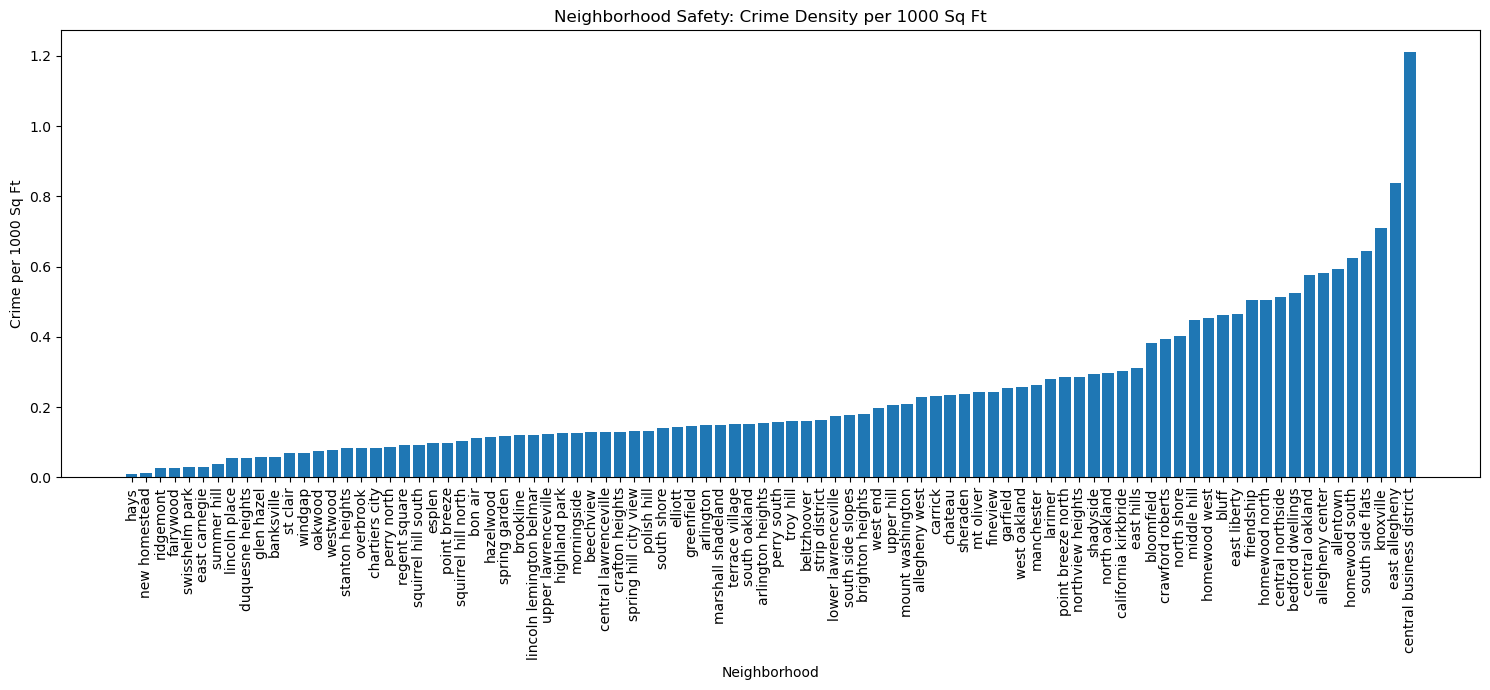

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('CrimeDensity_PerSqFt.csv')

df_sorted = df.sort_values('Crime per 1000 Sq Ft')#sorting so the graph goes from small to large ( safest to most dangerous)

# Create the bar chart
plt.figure(figsize=(15,7))
plt.bar(df_sorted['Neighborhood'], df_sorted['Crime per 1000 Sq Ft'])

plt.xlabel('Neighborhood')
plt.ylabel('Crime per 1000 Sq Ft')
plt.title('Neighborhood Safety: Crime Density per 1000 Sq Ft')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


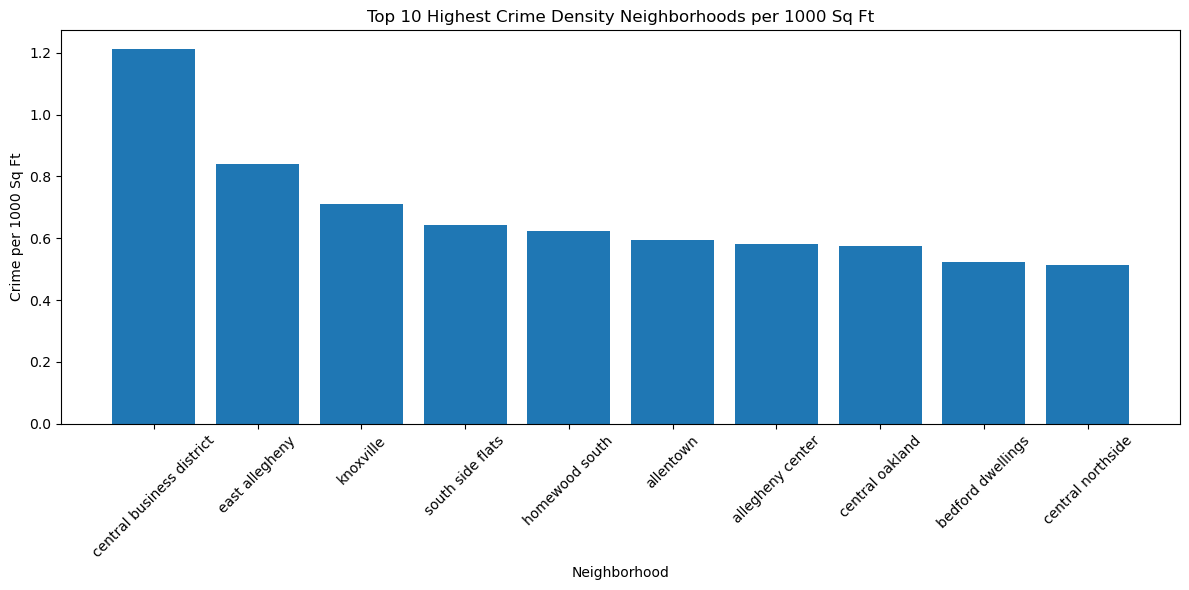

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('CrimeDensity_PerSqFt.csv')

top10 = df.sort_values('Crime per 1000 Sq Ft', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Neighborhood'], top10['Crime per 1000 Sq Ft'])

plt.xlabel('Neighborhood')
plt.ylabel('Crime per 1000 Sq Ft')
plt.title('Top 10 Highest Crime Density Neighborhoods per 1000 Sq Ft')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bar graph of the least safe neighboorhoods

In [14]:
import pandas as pd
#table
df = pd.read_csv('CrimeDensity_PerSqFt.csv')
top10 = df.sort_values('Crime per 1000 Sq Ft', ascending=False).head(10)

print(top10[['Neighborhood', 'Crime Count', 'Crime per 1000 Sq Ft']])


                Neighborhood  Crime Count  Crime per 1000 Sq Ft
0  central business district        18206                 1.212
1             east allegheny         5496                 0.839
2                  knoxville         5937                 0.711
3           south side flats        16586                 0.644
4             homewood south         6735                 0.624
5                  allentown         4922                 0.594
6           allegheny center         3387                 0.581
7            central oakland         4492                 0.575
8          bedford dwellings         2568                 0.524
9          central northside         3713                 0.513


These are the least safe neighborhoods

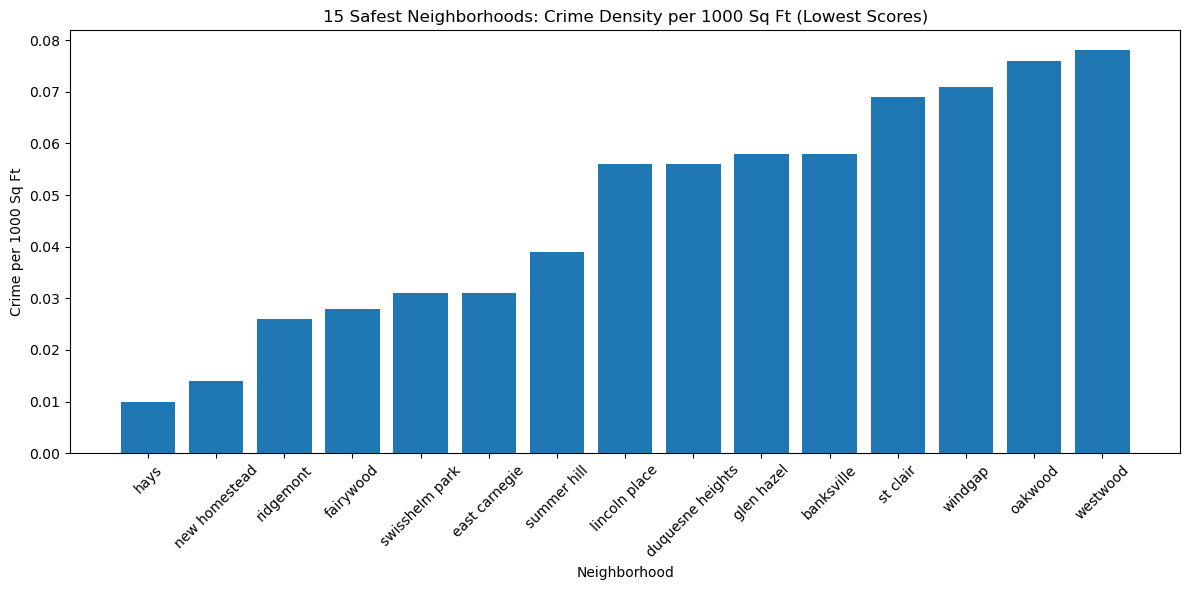

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CrimeDensity_PerSqFt.csv')
safest15 = df.sort_values('Crime per 1000 Sq Ft', ascending=True).head(15)

plt.figure(figsize=(12,6))
plt.bar(safest15['Neighborhood'], safest15['Crime per 1000 Sq Ft'])

plt.xlabel('Neighborhood')
plt.ylabel('Crime per 1000 Sq Ft')
plt.title('15 Safest Neighborhoods: Crime Density per 1000 Sq Ft (Lowest Scores)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
#15 safest
df = pd.read_csv('CrimeDensity_PerSqFt.csv')
safest15 = df.sort_values('Crime per 1000 Sq Ft', ascending=True).head(15)

print(safest15[['Neighborhood', 'Crime Count', 'Crime per 1000 Sq Ft']])


        Neighborhood  Crime Count  Crime per 1000 Sq Ft
89              hays          471                 0.010
88     new homestead          319                 0.014
87         ridgemont          259                 0.026
86         fairywood          746                 0.028
84    swisshelm park          412                 0.031
85     east carnegie          370                 0.031
83       summer hill          476                 0.039
81     lincoln place         1545                 0.056
82  duquesne heights          975                 0.056
79        glen hazel          744                 0.058
80        banksville         1574                 0.058
78          st clair          600                 0.069
77           windgap          830                 0.071
76           oakwood          536                 0.076
75          westwood         1493                 0.078


Overall, we can see the safest cities.

To compare these city to the other groups' values I will noramlize them. This will allow my group to combine the num

In [16]:
import pandas as pd
# Using basic math I normalized this so the safest city is 100 and the most dangerous is 0
df = pd.read_csv('CrimeDensity_PerSqFt.csv')

min_val = df['Crime per 1000 Sq Ft'].min()
max_val = df['Crime per 1000 Sq Ft'].max()
df['Safety Score (out of 100)'] = 100 * (max_val - df['Crime per 1000 Sq Ft']) / (max_val - min_val)
df.to_csv('CrimeDensity_PerSqFt.csv', index=False)


Reflection: When reflecting, I realize that Pittsburgh is a relatively safe city. Living in central Oakland, I have firsthand experience of living in the 7th most dangerous and I have never felt unsafe at all. I feel safety is a major part of neighborhoods, and looking at the crime density per area, it seems Hays is the safest. It is also interesting how much crime rates can different in such a short area.

Now I have the data and just need to combine my score out of 100 with my groupmates, and whichever neighborhood has the highest score is the best.